In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
billboard_df = pd.read_csv('./final_data.csv')

In [3]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

def results(y, preds):
    print('Matrix confusion:')
    ConfusionMatrixDisplay.from_predictions( y, preds)
    plt.show()
    print('Classification report: \n',classification_report(y,preds,zero_division=True))
    print('Accuracy score: \n', accuracy_score(y, preds))
    print('Absolute error:\n',mean_absolute_error(y, preds))

In [4]:
billboard_df = drop_specific_cols(billboard_df, ['e_spotify', 'e_grammy'])

In [5]:
#variable to predict
y = billboard_df.e_billboard

In [6]:
#features
#we do not consider 'key' based on boxplot observation (title and artist name are not physical variables)
billboard_features = ['duration', 'end_of_fade_in', 'loudness', 'mode','start_of_fade_out', 'tempo', 'time_signature']
X = billboard_df[billboard_features]

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)

In [8]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_X, train_y)
rf_billboard_preds = forest_model.predict(val_X)

Matrix confusion:


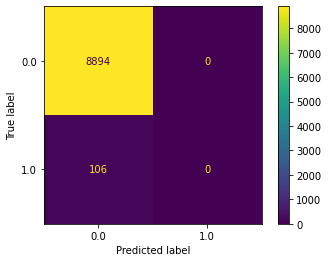

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8894
         1.0       1.00      0.00      0.00       106

    accuracy                           0.99      9000
   macro avg       0.99      0.50      0.50      9000
weighted avg       0.99      0.99      0.98      9000

Accuracy score: 
 0.9882222222222222
Absolute error:
 0.011777777777777778


In [9]:
results(val_y, rf_billboard_preds)

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [11]:
svm_model = SVC(kernel='sigmoid', random_state=1)
svm_model.fit(train_X, train_y)
svm_billboard_preds = svm_model.predict(val_X)

Matrix confusion:


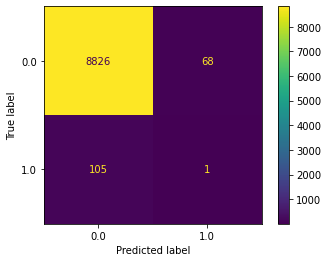

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8894
         1.0       0.01      0.01      0.01       106

    accuracy                           0.98      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.98      0.98      0.98      9000

Accuracy score: 
 0.9807777777777777
Absolute error:
 0.019222222222222224


In [12]:
results(val_y, svm_billboard_preds)

In [13]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)
knn_billboard_preds = knn_model.predict(val_X)

Matrix confusion:


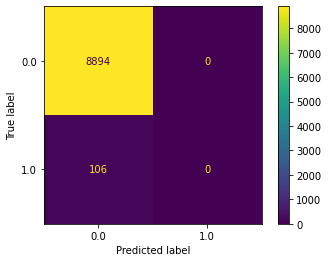

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8894
         1.0       1.00      0.00      0.00       106

    accuracy                           0.99      9000
   macro avg       0.99      0.50      0.50      9000
weighted avg       0.99      0.99      0.98      9000

Accuracy score: 
 0.9882222222222222
Absolute error:
 0.011777777777777778


In [15]:
results(val_y, knn_billboard_preds)

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [17]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(train_X, train_y)
logistic_billboard_preds = logistic_model.predict(val_X)

Matrix confusion:


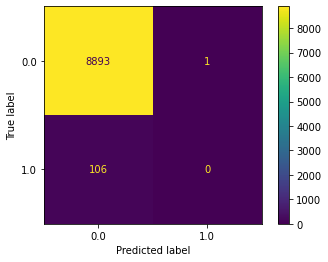

Classification report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8894
         1.0       0.00      0.00      0.00       106

    accuracy                           0.99      9000
   macro avg       0.49      0.50      0.50      9000
weighted avg       0.98      0.99      0.98      9000

Accuracy score: 
 0.9881111111111112
Absolute error:
 0.011888888888888888


In [18]:
results(val_y, logistic_billboard_preds)